# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 UFO Clean Dataset](#3.4.1_UFO_Clean_Dataset)
    * [3.4.2 Final cleaning if any required](#3.4.2_Final_cleaning_if_any_required)
  * [3.5 Univariate Data Exploration](#3.5_Univariate_Data_Exploration)
    * [3.5.1 Top_10_UFO Sightings by Country](#3.5.1_Top_10_UFO_Sightings_by_Country)
    * [3.5.2 Top UFO Sightings in US by State](#3.5.2_Top_UFO_Sightings_in_US_by_State)
    * [3.5.3 UFO Sightings Trend by Year](#3.5.3_UFO_Sightings_Trend_by_Year)
    * [3.5.4 UFO Sightings Trend by Day of the Year](#3.5.4_UFO_Sightings_Trend_by_day_of_the_Year)
    * [3.5.5 UFO Sightings Distribution by Month](#3.5.5_UFO_Sightings_Distribution_by_Month)
    * [3.5.6 Sightings by Time of Day](#3.5.6_Sightings_by_Time_of_day)
    * [3.5.7 Sightings by Decade](#3.5.7_Sightings_by_Decade)
    * [3.5.8 Sightings by Season](#3.5.8_Sightings_by_Season)
    * [3.5.9 Sightings Duration Analysis](#3.5.9_Sightings_Duration_Analysis)
    * [3.5.10 Sightings by Shape](#3.5.10_Sightings_by_Shape)
  * [3.6 Bivariate Data Exploration](#3.6_Bivariate_Data_Exploration)
    * [3.6.1 Avg Duration by Country](#3.6.1_Avg_Duration_by_Country)
    * [3.6.2 Avg Duration by Shape](#3.6.2_Avg_Duration_by_Shape)
    * [3.6.3 Avg Duration over the Years](#3.6.3_Avg_Duration_over_the_Years)
  * [3.7 Significance Hypothesis](#3.7_Significance_Hypothesis)  
  
     

## 3.2 Introduction<a id='3.2_Introduction'></a>

* At this point, after doing some wrangling on our original dataset, we now have a pretty clean, nicely formatted and consistent dataset for our deep exploration of its features and to understand their relationship with each other. 
* In this we will also try to find our target variable for modelling as well as a hypothesis to gain some meaningful insight about the features 

## 3.3 Imports<a id='3.3_Imports'></a>

In [415]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
from datetime import datetime
import geopandas as gpd
import plotly.graph_objects as go
from sklearn.preprocessing import MultiLabelBinarizer

import statsmodels.api as sm
import statsmodels.stats.multicomp
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [266]:
from platform import python_version
print(python_version())

3.7.3


## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 UFO Clean Dataset<a id='3.4.1_UFO_Clean_Dataset'></a>

In [3]:
ufo = pd.read_csv(r'ufo_cleaned.csv',low_memory = False, parse_dates = True)

In [4]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83392 entries, 0 to 83391
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date_time         83392 non-null  object
 1   Duration_minutes  83189 non-null  object
 2   Description       83392 non-null  object
 3   Date_posted       83392 non-null  object
 4   lat_long          83392 non-null  object
 5   Country           83388 non-null  object
 6   State             83329 non-null  object
 7   City              83392 non-null  object
 8   Shape_final       83392 non-null  object
 9   Year              83392 non-null  int64 
 10  Month             83392 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.0+ MB


In [5]:
ufo.head()

,Date_time,Duration_minutes,Description,Date_posted,lat_long,Country,State,City,Shape_final,Year,Month
0,1949-10-10 20:30:00,45.0,This event took place in early fall around 194...,2004-04-27 00:00:00,"(29.8830556, -97.9411111)",US,Texas,San Marcos,['cylinder'],1949,October
1,1949-10-10 21:00:00,60.0,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16 00:00:00,"(29.38421, -98.581082)",US,Texas,Lackland Air Force Base,['light'],1949,October
2,1955-10-10 17:00:00,0.3333333333333333,Green/Orange circular disc over Chester&#44 En...,2008-01-21 00:00:00,"(53.2, -2.916667)",GB,England,Blacon,['circle'],1955,October
3,1956-10-10 21:00:00,30.0,My older brother and twin sister were leaving ...,2004-01-17 00:00:00,"(28.9783333, -96.6458333)",US,Texas,Edna,['circle'],1956,October
4,1960-10-10 20:00:00,15.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22 00:00:00,"(21.4180556, -157.8036111)",US,Hawaii,Kane'ohe,['light'],1960,October


### 3.4.2 Final cleaning if any required<a id='3.4.2_Final_cleaning_if_any_required'></a>

In [6]:
 ufo['Date_time'] = ufo['Date_time'].map({t:pd.to_datetime(t,errors="coerce") for t in ufo.Date_time.unique()})
 ufo['Date_posted'] = ufo['Date_posted'].map({t:pd.to_datetime(t,errors="coerce") for t in ufo.Date_posted.unique()})

In [7]:
ufo['Duration_minutes'] = pd.to_numeric(ufo['Duration_minutes'],errors='coerce')

In [8]:
ufo = ufo.dropna(subset = ['Duration_minutes'])

In [9]:
ufo = ufo.dropna(subset = ['State'])

In [10]:
ufo = ufo.dropna(subset = ['Country'])

In [11]:
ufo.isnull().sum()

Date_time           0
Duration_minutes    0
Description         0
Date_posted         0
lat_long            0
Country             0
State               0
City                0
Shape_final         0
Year                0
Month               0
dtype: int64

In [12]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77546 entries, 0 to 83389
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_time         77546 non-null  datetime64[ns]
 1   Duration_minutes  77546 non-null  float64       
 2   Description       77546 non-null  object        
 3   Date_posted       77546 non-null  datetime64[ns]
 4   lat_long          77546 non-null  object        
 5   Country           77546 non-null  object        
 6   State             77546 non-null  object        
 7   City              77546 non-null  object        
 8   Shape_final       77546 non-null  object        
 9   Year              77546 non-null  int64         
 10  Month             77546 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 7.1+ MB


<b> After loading and cleaning the data before exploring, steps here included
      
    * Checking and making sure there are no null vales
    * correcting the data types
    For Final dataset for exploration, we have 77546 Records with 11 features

## 3.5 Univariate Data Exploration<a id='3.5_Univariate_Data_Exploration'></a>

### 3.5.1 Top_10_UFO Sightings by Country<a id='3.5.1_Top_10_UFO_Sightings_by_Country'></a>

In [13]:
ufo_co = ufo.groupby('Country')['Date_time'].count()

In [14]:
ufo_co_10 = ufo_co.sort_values(ascending = False).head(10)

In [15]:
ufo_co_10

Country
US    67410
CA     3419
GB     2256
GH     1298
AU      609
MX      217
IN      207
DE      129
NL      107
BR       95
Name: Date_time, dtype: int64

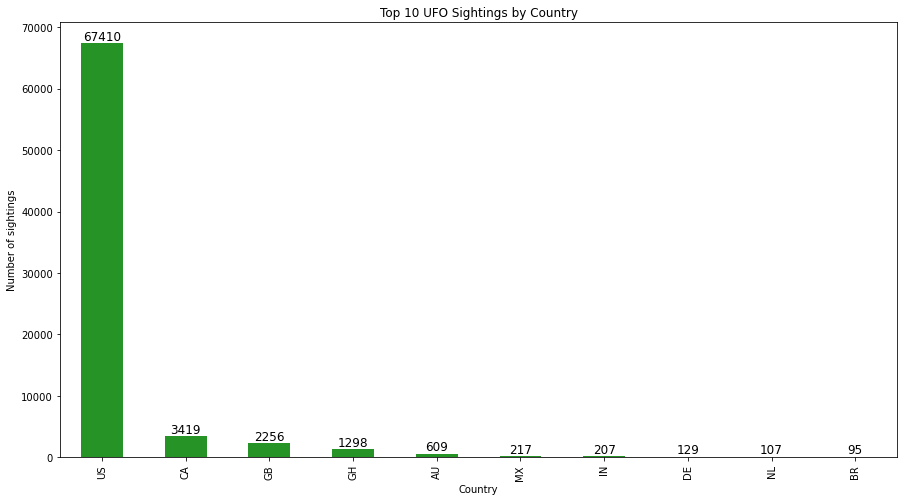

In [16]:
fig, ax = plt.subplots(figsize=(15,8))

ufo_co_10.plot(kind = 'bar', color='green', alpha=0.85)
plt.xlabel('Country')
plt.ylabel('Number of sightings')
plt.title("Top 10 UFO Sightings by Country")

for index,data in enumerate(ufo_co_10):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=12), ha = 'center', va = 'bottom')
plt.show()


<b> looking at country wise distriubtion for UFO Sightinggs, We find that Most of the UFOs are seen in USA but it can be beause the data procurred is from an American Agency, NUFORC, followed by Canada and Great Britain which have far less sightings

### 3.5.2 Top UFO Sightings in US by State<a id='3.5.2_Top_UFO_Sightings_in_US_by_State'></a>

In [284]:
ufo_us = ufo[ufo['Country'] == 'US']

In [298]:
import us

In [305]:
ufo_us.head()

,Date_time,Duration_minutes,Description,Date_posted,lat_long,Country,State,City,Shape_final,Year,Month,state_code
0,1949-10-10 20:30:00,45.000,This event took place in early fall around 194...,2004-04-27,"(29.8830556, -97.9411111)",US,Texas,San Marcos,['cylinder'],1949,October,None
1,1949-10-10 21:00:00,60.000,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,"(29.38421, -98.581082)",US,Texas,Lackland Air Force Base,['light'],1949,October,None
3,1956-10-10 21:00:00,30.000,My older brother and twin sister were leaving ...,2004-01-17,"(28.9783333, -96.6458333)",US,Texas,Edna,['circle'],1956,October,None
4,1960-10-10 20:00:00,15.000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,"(21.4180556, -157.8036111)",US,Hawaii,Kane'ohe,['light'],1960,October,None
5,1961-10-10 19:00:00,5.000,My father is now 89 my brother 52 the girl wit...,2007-04-27,"(36.595, -82.1888889)",US,Tennessee,Bristol,['sphere'],1961,October,None


In [286]:
ufo_s = ufo_us.groupby('State')['Date_time'].count()

In [293]:
df_us = pd.DataFrame({'State': ufo_s.index, 'Sightings':ufo_s.values} )

In [317]:
cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
cw_filename = 'state_codes.html'
states = pd.read_html(cw_location + cw_filename)[0]

# Create New Variable With State Abbreviations
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
df_us['StAbbr'] = df_us['State'].map(state_code_map)

In [419]:
df_us.sort_values(by = 'Sightings', ascending = False).head(5)

,State,Sightings,StAbbr
4,California,9157,CA
8,Florida,4023,FL
46,Washington,3941,WA
42,Texas,3502,TX
31,New York,3103,NY


In [319]:
fig = go.Figure(data=go.Choropleth(
    locations=df_us['StAbbr'], # Spatial coordinates
    z = df_us['Sightings'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Sightings",
))

fig.update_layout(
    title_text = 'UFO Sightings by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

<b> If we look at US State distribution for top 5 states, we find that California leads with more than 9000 sightings follwed by 

* Florida, 
* Washington, 
* Texas and 
* New York

### 3.5.3 UFO Sightings Trend by Year<a id='3.5.3_UFO_Sightings_Trend_by_Year'></a>

In [32]:
total = ufo['Year'][(ufo['Year'] >= 1949) & (ufo['Year'] <= 2017)]

In [37]:
total.value_counts().sort_values(ascending = False)

2012    7168
2013    6859
2011    4947
2008    4657
2009    4369
        ... 
1955      31
1953      31
1950      28
1951      22
1949      18
Name: Year, Length: 66, dtype: int64

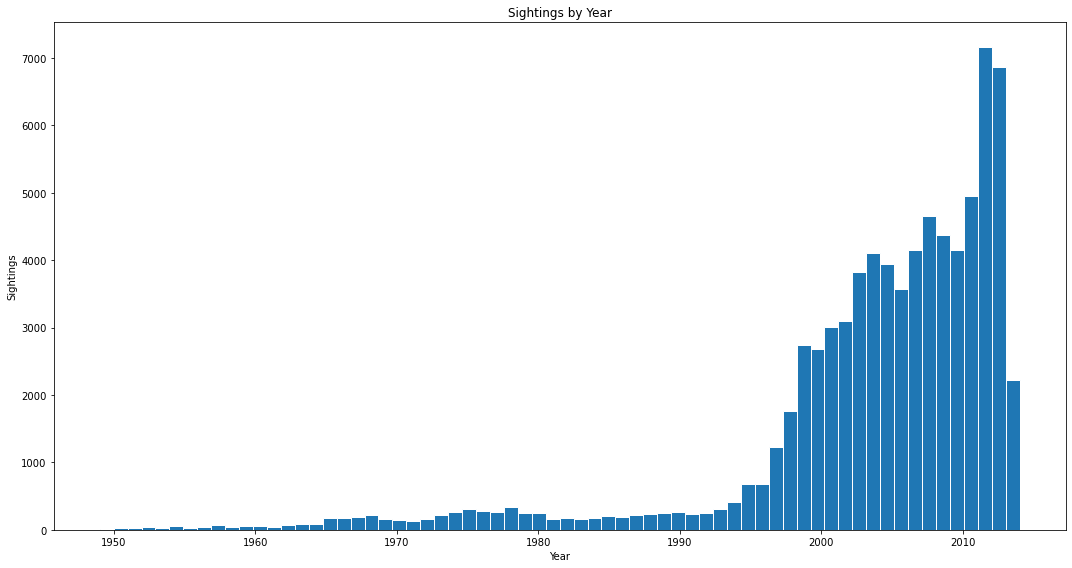

In [43]:
fig, ax = plt.subplots(figsize=(15,8))
plt.hist(total, len(total.value_counts()), edgecolor = 'white')

plt.xlabel('Year')
plt.ylabel('Sightings')
plt.title('Sightings by Year')
plt.axis('tight')
plt.tight_layout()
   # plt.savefig('Sightings_by_Year_300dpi.png', format='png',dpi=300)
    #plt.show()
plt.show()

<b> For the UFO sighting trend over the last 70 years, it is observed that since 2000 onwards there has been a huge increase in sigthings starting from close to 3000 and going up to almost 7000 in 2012 and 2013

### 3.5.4 UFO Sightings Trend by Day of the Year<a id='3.5.4_UFO_Sightings_Trend_by_day_of_the_Year'></a>

In [44]:
ufo_yd = ufo[['Date_time', 'Year']]

In [48]:
ufo_yd['yd'] = ufo['Date_time'].dt.dayofyear

D:\Anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


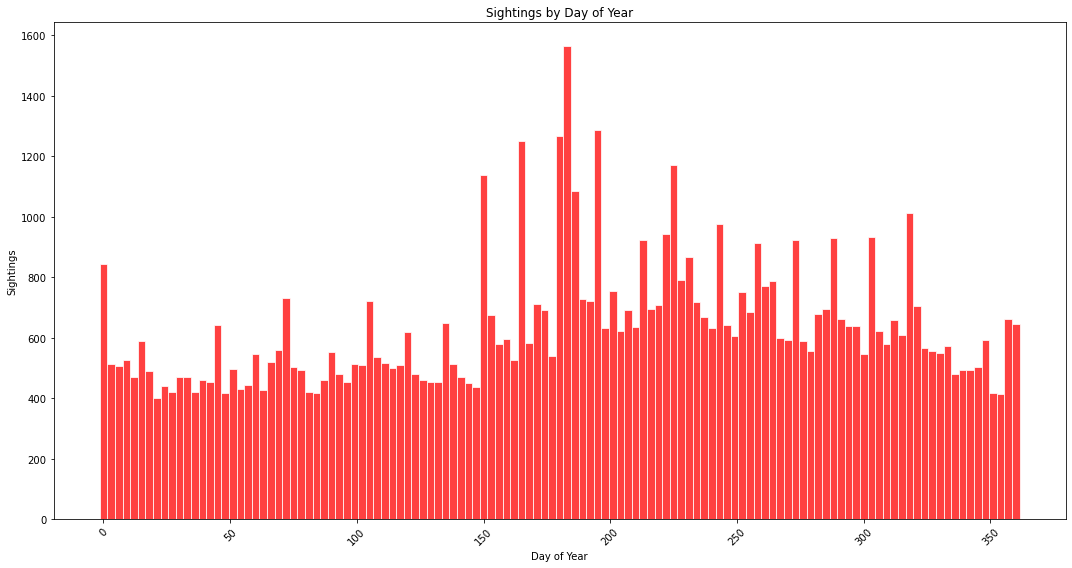

In [54]:
fig, ax = plt.subplots(figsize=(15,8))
ufo_yd['yd'].hist(bins=np.arange(0,365,3), align='left',alpha=0.75, color = 'red', edgecolor = 'white')
plt.ylabel('Sightings')
plt.xlabel('Day of Year')
plt.xlim([0,365])

plt.xticks(rotation='45')
plt.title('Sightings by Day of Year', **font)
plt.axis('tight')
plt.grid(False)
plt.tight_layout()
#plt.savefig('Sightings_by_DayOfYear.png', format = 'png', dpi = 300)
plt.show()

<b> If we see distribution by day if the year it doesn't really give much insight but more sightings are recorded during the midde of the year

### 3.5.5 UFO Sightings Distribution by Month<a id='3.5.5_UFO_Sightings_Distribution_by_Month'></a>

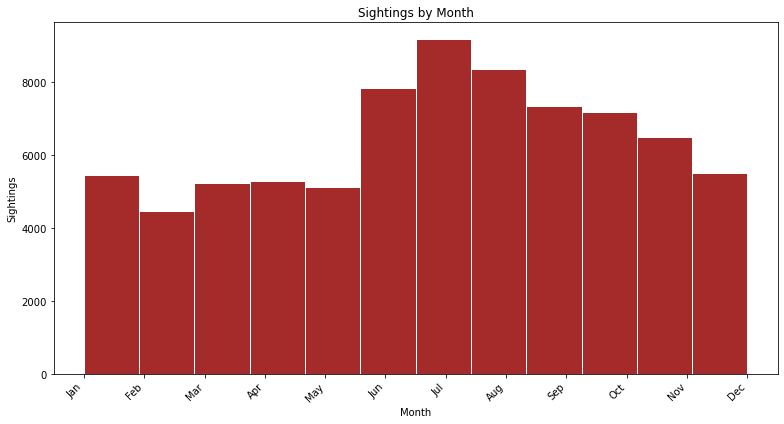

In [64]:
fig, ax = plt.subplots(figsize=(11,6))

total = ufo['Date_time'].dt.month[(ufo['Date_time'].dt.month >= 1) & (ufo['Date_time'].dt.month <= 12)]
months = {'Jan':1,'Feb':2,'Mar':3,
              'Apr':4,'May':5,'Jun':6,
              'Jul':7,'Aug':8,'Sep':9,
              'Oct':10,'Nov':11,'Dec':12}

plt.hist(total, len(total.value_counts()), edgecolor = 'white', color = 'brown')
plt.xticks(list(months.values()),list(months.keys()),ha='right',rotation='45')
plt.xlim([0.5,12.5])
plt.xlabel('Month')
plt.ylabel('Sightings')
plt.title('Sightings by Month', **font)
plt.tight_layout()
#plt.savefig('Sightings_by_Month_300dpi.png', format='png',dpi=300)
plt.show()



<b> for UFO distribution by months, it can be seen that sightings begin to rise after half of the year is done and then again decrease by the end of the year, It is at peak during July and August with almost more than 8000 sightings 

### 3.5.6 Sightings by Time of Day<a id='3.5.6_Sightings_by_Time_of_day'></a>

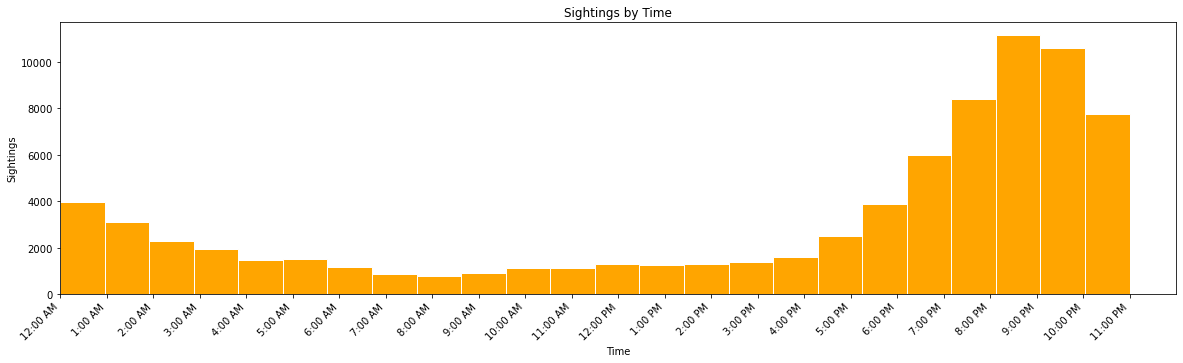

In [117]:
fig, ax = plt.subplots(figsize=(20,5))

total = ufo['Date_time'].dt.hour[(ufo['Date_time'].dt.hour >= 0) & (ufo['Date_time'].dt.hour <= 23)]
times = {'12:00 AM':0, '1:00 AM':1, '2:00 AM':2, '3:00 AM':3, '4:00 AM':4, '5:00 AM':5, '6:00 AM':6, '7:00 AM':7,
         '8:00 AM':8, '9:00 AM':9, '10:00 AM':10, '11:00 AM':11, '12:00 PM':12, '1:00 PM':13, '2:00 PM':14, 
         '3:00 PM':15, '4:00 PM':16, '5:00 PM':17, '6:00 PM':18, '7:00 PM':19, '8:00 PM':20, '9:00 PM':21, 
         '10:00 PM':22, '11:00 PM':23}

plt.hist(total, len(total.value_counts()), edgecolor = 'white', color = 'orange')
plt.xticks(list(times.values()),list(times.keys()),ha='right',rotation='45')
plt.xlim([0,24])
plt.xlabel('Time')
plt.ylabel('Sightings')
plt.title('Sightings by Time', **font)
#plt.tight_layout()
#ax.set_xticklabels(['','5:00 AM','10:00 AM','3:00 PM','8:00 PM','11:00 PM'])
#plt.tight_layout()
plt.show()

<b> To map sightings byt time of the day, this is more practical and common as observed taht most of the sightings are 
between 7:00 PM and 11:00 PM, during mornings and afternoon, it drops to less than 2000 whereas evening onwards it rises upto 10000

### 3.5.7 Sightings by Decade<a id='3.5.7_Sightings_by_Decade'></a>

In [118]:
decades = ['1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s']
ufo_yd['Decade'] = pd.cut(x=ufo_yd['Date_time'].dt.year.astype(int),
       bins=[1940,1950,1960,1970,1980,1990,2000,2010,2020],
       labels=decades)

D:\Anacon\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [145]:
ufo_yd.tail(10)

,Date_time,Year,yd,hour,Decade
83378,2013-09-09 20:21:00,2013,252,20,2010s
83379,2013-09-09 21:00:00,2013,252,21,2010s
83380,2013-09-09 21:00:00,2013,252,21,2010s
83381,2013-09-09 21:00:00,2013,252,21,2010s
83382,2013-09-09 21:00:00,2013,252,21,2010s
83383,2013-09-09 21:00:00,2013,252,21,2010s
83384,2013-09-09 21:15:00,2013,252,21,2010s
83385,2013-09-09 22:00:00,2013,252,22,2010s
83388,2013-09-09 22:20:00,2013,252,22,2010s
83389,2013-09-09 23:00:00,2013,252,23,2010s


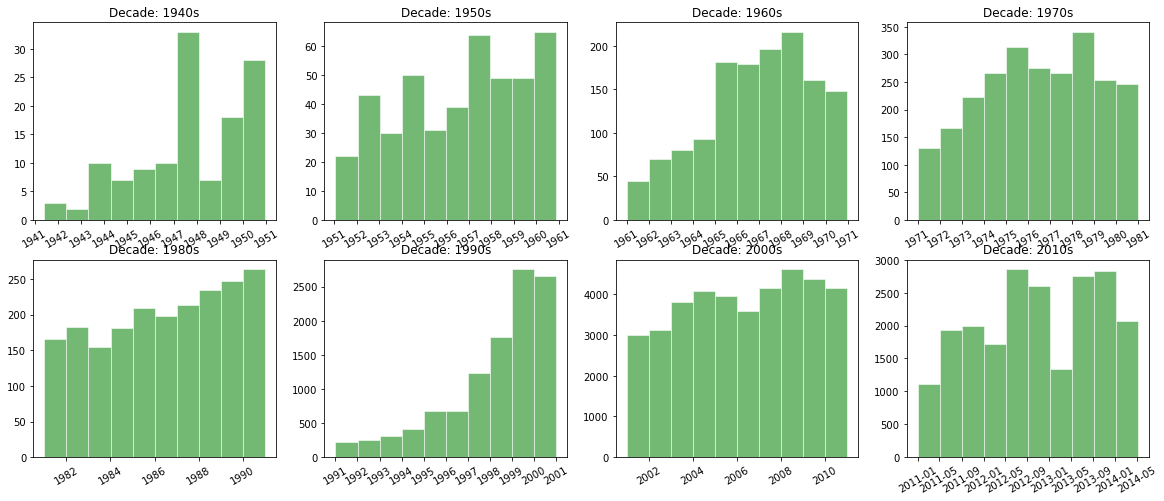

In [146]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8))
for i, ax in enumerate(axes.flatten()):
    
   
    t = ufo_yd[ufo_yd['Decade']==decades[i]]['Date_time']
    
 
    #histogram
    ax.hist(t, bins=10, edgecolor='white', alpha=0.55, color='green')
    ax.tick_params(axis='x', rotation=30)
    ax.set_title("Decade: {}".format(decades[i]))

plt.show()

<b> If we view sightings by decades it can be seen that 60s, 70s, and 80s had sightings in hundreds every year, but 90s onwards especially after 2000 it was in the range of more than 2500 sightings every year and this has been the trend for last three decades

### 3.5.8 Sightings by Season<a id='3.5.8_Sightings_by_Season'></a>

In [147]:
ufo_yd['season'] = (ufo_yd['Date_time'].dt.month%12 + 3)//3

D:\Anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
season_dict = {1:'Winter',2:'Spring',3:'Summer',4:'Autumn'}
ufo_yd['season'] = ufo_yd['season'].map(season_dict)

D:\Anacon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


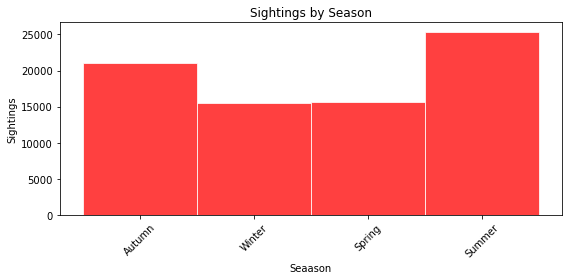

In [160]:
fig, ax = plt.subplots(figsize=(8,4))
ufo_yd['season'].hist(bins=np.arange(0,5,1), align='left',alpha=0.75, color = 'red', edgecolor = 'white')
plt.ylabel('Sightings')
plt.xlabel('Seaason')
plt.xlim([1,4])

plt.xticks(rotation='45')
plt.title('Sightings by Season', **font)
plt.axis('tight')
plt.grid(False)
plt.tight_layout()

<b> Summer season has the most sightings probably beacuse people are more outside in summers than winters and ther seasons

### 3.5.9 Sightings Duration Analysis<a id='3.5.9_Sightings_Duration_Analysis'></a>

In [183]:
pd.options.display.float_format = '{:.3f}'.format

In [172]:
ufo['Duration_minutes'] = ufo['Duration_minutes'].astype(float)

In [195]:
ufo = ufo[ufo['Duration_minutes'] < 10000]

In [201]:
ufo.Duration_minutes.describe()

count   77544.000
mean       15.065
std        72.835
min         0.000
25%         0.500
50%         3.000
75%        10.000
max      5760.000
Name: Duration_minutes, dtype: float64

In [196]:
ufo.Duration_minutes.sort_values(ascending = False).head(10)

52594   5760.000
1285    4500.000
37418   4320.000
24462   4320.000
1271    4320.000
46741   2880.000
22720   2880.000
57472   2700.000
46476   2700.000
44703   2700.000
Name: Duration_minutes, dtype: float64

<AxesSubplot:>

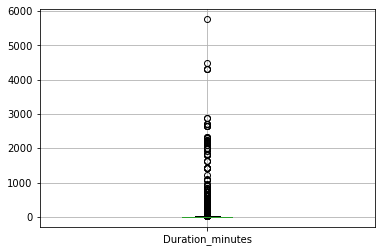

In [197]:
ufo.boxplot(['Duration_minutes'])

In [207]:
ufo_2 = ufo[ufo['Duration_minutes'] < 210]

In [423]:
ufo_2.Duration_minutes.describe()

count   76934.000
mean       11.264
std        24.044
min         0.000
25%         0.500
50%         3.000
75%        10.000
max       201.000
Name: Duration_minutes, dtype: float64

<AxesSubplot:>

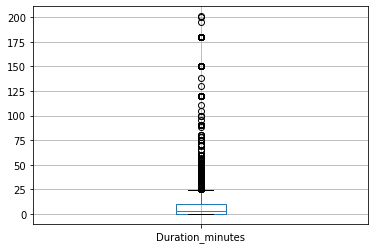

In [208]:
ufo_2.boxplot(['Duration_minutes'])

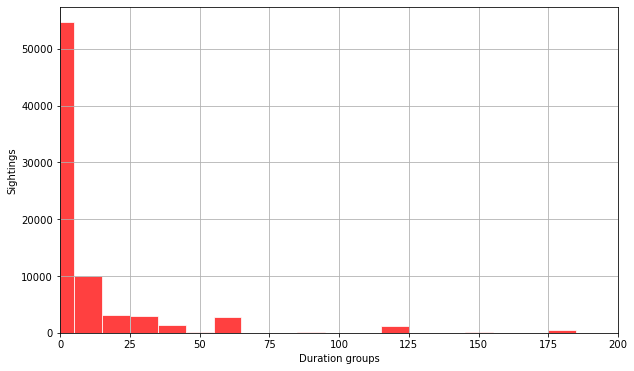

In [424]:
plt.figure(figsize = (10,6))
ufo['Duration_minutes'].hist(bins=np.arange(0,200,10), align='left',alpha=0.75, color = 'red', edgecolor = 'white')
plt.ylabel('Sightings')
plt.xlabel('Duration groups')
plt.xlim([0,200])

plt.show()

<b> * For Duration I observed a massive outlier with 137800 minutes, which I though din't makes sense so after deleting it,
* if we observe we still have max value of 5760 minutes which also is suspicious but I didn't delete it and viewing the boxplot and summary, it can be seen that avg duration is around 15 minutes with std of 72 
* If we look at the IQR its between 0.5 minutes and 10 minutes which is clearly very less as comared to max value
* so I created another boxplot with data with 3 Standara deviation from mean, it can be observed that 
    * with Max values of 201 minutes, 
    * our mean drops down to 11.2 and std of 24 minutes 
    * with IQR bewteen 0 and 10 minutes 
* If we look at the duration histogram most of the sightings lie with first 5 bins that is less than 10 minutes    


### 3.5.10 Sightings by Shape<a id='3.5.10_Sightings_by_Shape'></a>

In [220]:
ufo_c = ufo.copy()

In [227]:
from ast import literal_eval

In [324]:
sh_counts = ufo_c['sh'].str.lower().value_counts()

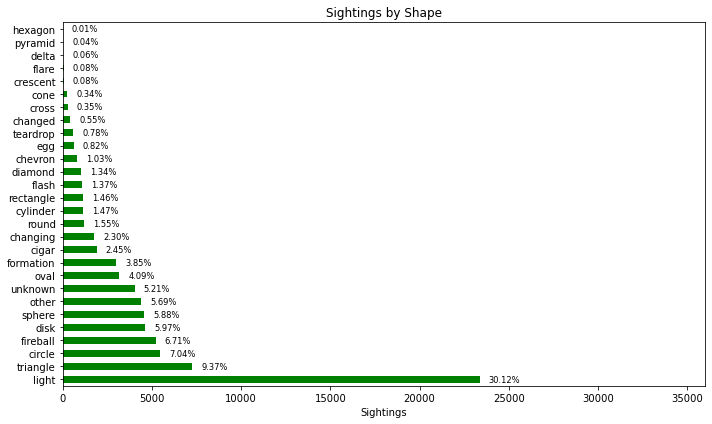

In [329]:
plt.figure(figsize = (10,6))
sh_counts.plot(kind = "barh", colormap = "ocean")
font = {'fontsize':'larger'}
percent_font = {'fontsize':'smaller'}
plt.title('Sightings by Shape', **font)
plt.xlabel('Sightings')
plt.xlim([0,36000])

shape_percent = [s*(100.0/sh_counts.sum()) for s in sh_counts]
X = sh_counts.values
Y = [i for i in range(len(shape_percent))]
for i in range(len(shape_percent)):
    x = X[i]+500
    y = Y[i]-0.2
    plt.text(x,y,'%.2f' % shape_percent[i] + '%', **percent_font)
plt.tight_layout()
plt.show()

<b> After getting shapes form the data, it can be seen that 30% of UFO sightings have light shape followed by traingle and circle at 9% and 7% respectively

## 3.6 Bivariate Data Exploration<a id='3.6_Bivariate_Data_Exploration'></a>

In [340]:
ufo_c.head()

,Date_time,Duration_minutes,Description,Date_posted,lat_long,Country,State,City,Shape_final,Year,Month,sh,lat,long
0,1949-10-10 20:30:00,45.000,This event took place in early fall around 194...,2004-04-27,"(29.8830556, -97.9411111)",US,Texas,San Marcos,[cylinder],1949,October,cylinder,29.883,-97.941
1,1949-10-10 21:00:00,60.000,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,"(29.38421, -98.581082)",US,Texas,Lackland Air Force Base,[light],1949,October,light,29.384,-98.581
2,1955-10-10 17:00:00,0.330,Green/Orange circular disc over Chester&#44 En...,2008-01-21,"(53.2, -2.916667)",GB,England,Blacon,[circle],1955,October,circle,53.200,-2.917
3,1956-10-10 21:00:00,30.000,My older brother and twin sister were leaving ...,2004-01-17,"(28.9783333, -96.6458333)",US,Texas,Edna,[circle],1956,October,circle,28.978,-96.646
4,1960-10-10 20:00:00,15.000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,"(21.4180556, -157.8036111)",US,Hawaii,Kane'ohe,[light],1960,October,light,21.418,-157.804


### 3.6.1 Avg Duration by Country<a id='3.6.1_Avg_Duration_by_Country'></a>

In [348]:
ufo_cou = ufo.groupby('Country')['Duration_minutes'].mean()

In [353]:
import country_converter as coco

In [350]:
df_co = pd.DataFrame({'Country': ufo_cou.index, 'Avg_dura':ufo_cou.values} )

In [374]:
df_co.head()

,Country,Avg_dura,code
0,AE,5.494,ARE
1,AF,5.167,AFG
2,AL,1.050,ALB
3,AM,5.500,ARM
4,AR,10.443,ARG


In [378]:
df_co.sort_values('Avg_dura', ascending = False). head(10)

,Country,Avg_dura,code
77,KG,1060.500,KGZ
124,SB,180.000,SLB
17,BO,104.800,BOL
117,PW,61.000,PLW
33,CV,60.000,CPV
46,FJ,60.000,FJI
55,GT,46.826,GTM
63,ID,45.750,IDN
76,KE,42.230,KEN
21,BW,37.500,BWA


In [377]:
fig = go.Figure(data=go.Choropleth(
locations = df_co['code'],
    z = df_co['Avg_dura'],
    #text = df['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = ' Minutes',
    colorbar_title = 'Average Visible Duration',
))

fig.update_layout(
    title_text='Avg Duration by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
    
)

fig.show()

<b> It can bes observed in this map that for first three countries, the avg duration for the observed UFO is too big beacuse of very few cases which also seems ingenuine, so I have made another map for more variability in colors after removing KGZ(top country with 1000 minutes as avergae duration and plotted it again below

In [379]:
# Without KGZ which has value of over 1000 minutes

df_kg = df_co[df_co['code'] != 'KGZ']

In [382]:
fig = go.Figure(data=go.Choropleth(
locations = df_kg['code'],
    z = df_kg['Avg_dura'],
    #text = df['COUNTRY'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = ' Minutes',
    colorbar_title = 'Average Visible Duration',
))

fig.update_layout(
    title_text='Avg Duration by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
    
)

fig.show()

### 3.6.2  Avg Duration by Shape<a id='3.6.2_Avg_Duration_by_Shape'></a>

In [228]:

ufo_c.loc[:,'Shape_final'] = ufo_c.loc[:,'Shape_final'].apply(lambda x: literal_eval(x))

In [234]:
ufo_c.loc[:, 'sh'] = ufo_c.Shape_final.map(lambda x: x[0])

In [238]:
shapes = ufo_c['sh'].str.lower().value_counts().index.tolist()

In [240]:
print(shapes)

['light', 'triangle', 'circle', 'fireball', 'disk', 'sphere', 'other', 'unknown', 'oval', 'formation', 'cigar', 'changing', 'round', 'cylinder', 'rectangle', 'flash', 'diamond', 'chevron', 'egg', 'teardrop', 'changed', 'cross', 'cone', 'crescent', 'flare', 'delta', 'pyramid', 'hexagon']


<Figure size 720x432 with 0 Axes>

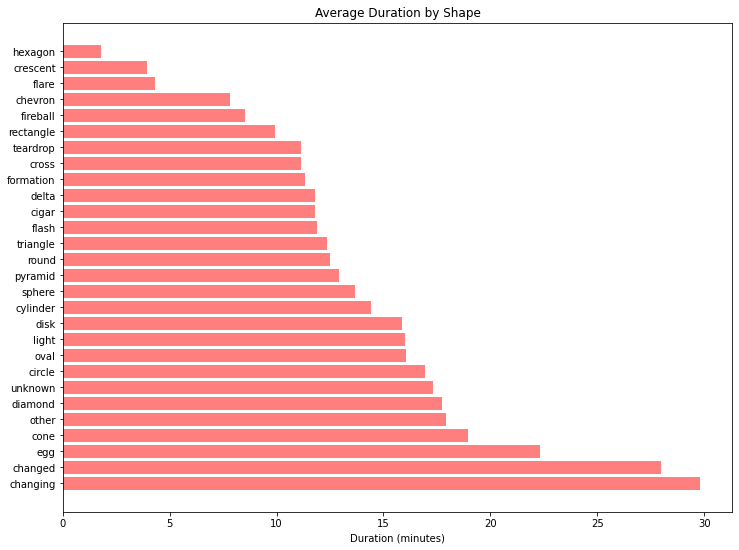

In [387]:
plt.figure(figsize = (10,6))
means = [ufo_c['Duration_minutes'][ufo_c['sh'].str.lower() == shape].mean() for shape in shapes]
means = [float(x) for x in means]
tuples = [*zip(shapes,means)]
tuples.sort(key = lambda x: x[1], reverse=True)
shapes, means = zip(*tuples)
plt.figure(figsize = (12,9))
plt.title('Average Duration by Shape')
plt.xlabel('Duration (minutes)')
idy = np.arange(len(shapes))
plt.barh(idy,means,alpha=0.5,color ='red')
plt.yticks(idy,shapes)


plt.show()

<b> When it comes to The average duration by shape, its observed that
    
        * Changing shape has the longest average duration
        * followed by Egg 
        * and cone shape

### 3.6.3  Avg Duration over the Years<a id='3.6.3_Avg_Duration_over_the_Years'></a>

In [389]:
ufo_yr = ufo_c.groupby('Year')['Duration_minutes'].mean()

In [392]:
ufo_yr.head()

Year
1910   2.000
1916   1.000
1920   1.000
1925   1.000
1929   1.000
Name: Duration_minutes, dtype: float64

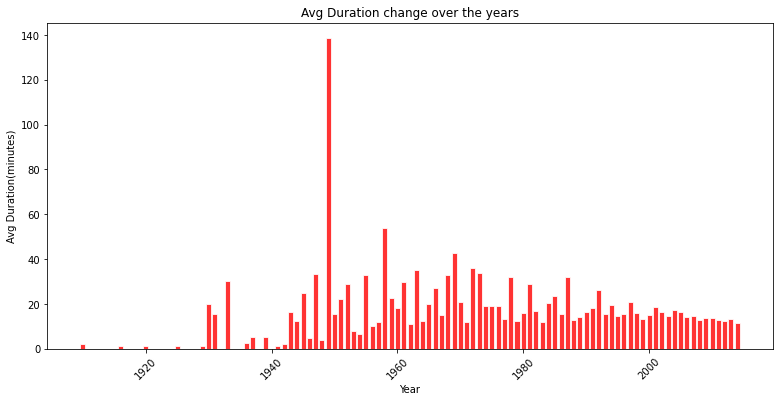

In [403]:
plt.figure(figsize = (13,6))
plt.bar(ufo_yr.index,ufo_yr.values, color = 'red', edgecolor = 'white', alpha = 0.8)
plt.ylabel('Avg Duration(minutes)')
plt.xlabel('Year')
#plt.xlim([1,4])

plt.xticks(rotation='45')
plt.title('Avg Duration change over the years', **font)
plt.show()

<b> If we map averge duration trend over the past years, we van visualize that for last 10-12 years avergae duration of UFO Sighting
has benn in range of 15 - 20 minutes

## 3.7 Significance Hypothesis<a id='3.7_Significance_Hypothesis'></a>

<b>This section is test the correlation or significance between shape and duration,
Our Hypothesis is  base on one categorical variable with more than 10 groups/categories and one continous variable
which is duration in minutes.
As mostly for this case to see if different shape groups have differn avg durations, ie. shape has some connection with duration, ANOVA tests are used most often to establish the significance

For our case

    * Null Hypotheses: There is no differnce between different shape groups in terms of avergae duration of visibility
    * Alternative Hypothesis: There is differnce between different shape groups in terms of avergae duration of visibility

<b>What is the ANOVA Test?
An Analysis of Variance Test, or ANOVA, can be thought of as a generalization of the t-tests for more than 2 groups. The independent t-test is used to compare the means of a condition between two groups. ANOVA is used when we want to compare the means of a condition between more than two groups.

ANOVA tests if there is a difference in the mean somewhere in the model (testing if there was an overall effect), but it does not tell us where the difference is (if there is one). To find where the difference is between the groups, we have to conduct post-hoc tests.

To perform any tests, we first need to define the null and alternate hypothesis:

* Null Hypothesis – There is no significant difference among the groups
* Alternate Hypothesis – There is a significant difference among the groups


In [404]:
ufo_c.head()

,Date_time,Duration_minutes,Description,Date_posted,lat_long,Country,State,City,Shape_final,Year,Month,sh,lat,long
0,1949-10-10 20:30:00,45.000,This event took place in early fall around 194...,2004-04-27,"(29.8830556, -97.9411111)",US,Texas,San Marcos,[cylinder],1949,October,cylinder,29.883,-97.941
1,1949-10-10 21:00:00,60.000,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,"(29.38421, -98.581082)",US,Texas,Lackland Air Force Base,[light],1949,October,light,29.384,-98.581
2,1955-10-10 17:00:00,0.330,Green/Orange circular disc over Chester&#44 En...,2008-01-21,"(53.2, -2.916667)",GB,England,Blacon,[circle],1955,October,circle,53.200,-2.917
3,1956-10-10 21:00:00,30.000,My older brother and twin sister were leaving ...,2004-01-17,"(28.9783333, -96.6458333)",US,Texas,Edna,[circle],1956,October,circle,28.978,-96.646
4,1960-10-10 20:00:00,15.000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,"(21.4180556, -157.8036111)",US,Hawaii,Kane'ohe,[light],1960,October,light,21.418,-157.804


In [405]:
ufo_sd = ufo_c[['sh','Duration_minutes']]

In [407]:
ufo_sd['sh'] = ufo_sd['sh'].str.lower()

D:\Anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [408]:
ufo_sd.head()

,sh,Duration_minutes
0,cylinder,45.000
1,light,60.000
2,circle,0.330
3,circle,30.000
4,light,15.000


<AxesSubplot:title={'center':'Duration_minutes'}, xlabel='sh'>

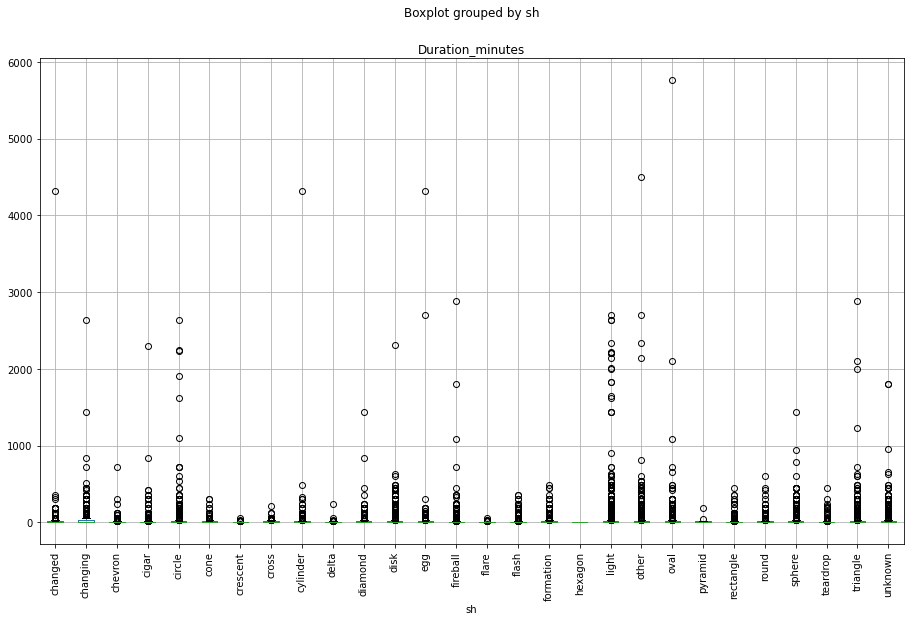

In [412]:
#plt.figure(figsize = (13,6))
ufo_sd.boxplot('Duration_minutes', by = 'sh', figsize = (15,9), rot = 90)

In [416]:
mod = ols('Duration_minutes~sh', data = ufo_sd).fit()
ano_table = sm.stats.anova_lm(mod, type = 2)
print(ano_table)

                df        sum_sq   mean_sq     F  PR(>F)
sh          27.000   1074292.066 39788.595 7.517   0.000
Residual 77516.000 410289558.740  5292.966   NaN     NaN


<b>When we conduct an ANOVA, we are attempting to determine if there is a statistically significant difference among the groups. So what if we find statistical significance?
If we find that there is a difference, we will then need to examine where the group differences lay. So, we’ll use the Tukey HSD test to identify where the difference lies

In [417]:
mc = statsmodels.stats.multicomp.MultiComparison(ufo_sd['Duration_minutes'],ufo_sd['sh'])
mc_results = mc.tukeyhsd()
print(mc_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj    lower    upper   reject
-------------------------------------------------------------
  changed  changing   1.8576    0.9  -12.7054  16.4206  False
  changed   chevron -20.1532 0.0013   -36.368  -3.9384   True
  changed     cigar -16.1659   0.01  -30.6389  -1.6929   True
  changed    circle -11.0159 0.3469  -24.5962   2.5645  False
  changed      cone  -9.0329    0.9   -30.267  12.2012  False
  changed  crescent -24.0065 0.7607  -60.7363  12.7232  False
  changed     cross -16.8398 0.3754  -37.8531   4.1735  False
  changed  cylinder -13.5246 0.1861  -28.8562   1.8071  False
  changed     delta -16.1661    0.9  -58.9563   26.624  False
  changed   diamond -10.2052 0.7519  -25.7361   5.3258  False
  changed      disk -12.1141 0.1787  -25.7829   1.5547  False
  changed       egg  -5.6354    0.9  -22.5651  11.2942  False
  changed  fireball -19.4302  0.001  -33.0351  -5.8254   True
  change

<b> As can be seen from the model summary of anova table, very low P-value rejects the null and proves that different shape groups have different average durations, and shape and surations have statistical significance
    
 From HSD Tukey test to establish statistical significance of distribution, we can see that every shape Reject has False for some cases which shoes that null can be rejected and those groups have statistically significant differnce

In [426]:
ufo_c.to_csv("ufo_c.csv", header = True, index = False)

In [ ]:
# Save the data 

datapath = 'D:/springboard/Cloned/DataScienceGuidedCapstone/data'
save_file(ski_data, 'ski_data_step3_features.csv', datapath)